<a href="https://colab.research.google.com/github/fozouni/data-science-exercises/blob/main/Market_segmentation_with_k_means_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('https://github.com/fozouni/data-science-exercises/raw/main/Mall_Customers.csv')

df.head(6)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76


In [3]:
col_names = [ 'Annual Income (k$)', 'Age','Spending Score (1-100)']

features = df[col_names]

features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,15,19,39
1,15,21,81
2,16,20,6
3,16,23,77
4,17,31,40


In [4]:
scaler = StandardScaler().fit(features)

features = scaler.transform(features)

features

array([[-1.73899919, -1.42456879, -0.43480148],
       [-1.73899919, -1.28103541,  1.19570407],
       [-1.70082976, -1.3528021 , -1.71591298],
       [-1.70082976, -1.13750203,  1.04041783],
       [-1.66266033, -0.56336851, -0.39597992],
       [-1.66266033, -1.20926872,  1.00159627],
       [-1.62449091, -0.27630176, -1.71591298],
       [-1.62449091, -1.13750203,  1.70038436],
       [-1.58632148,  1.80493225, -1.83237767],
       [-1.58632148, -0.6351352 ,  0.84631002],
       [-1.58632148,  2.02023231, -1.4053405 ],
       [-1.58632148, -0.27630176,  1.89449216],
       [-1.54815205,  1.37433211, -1.36651894],
       [-1.54815205, -1.06573534,  1.04041783],
       [-1.54815205, -0.13276838, -1.44416206],
       [-1.54815205, -1.20926872,  1.11806095],
       [-1.50998262, -0.27630176, -0.59008772],
       [-1.50998262, -1.3528021 ,  0.61338066],
       [-1.43364376,  0.94373197, -0.82301709],
       [-1.43364376, -0.27630176,  1.8556706 ],
       [-1.39547433, -0.27630176, -0.590

In [5]:
scaled_features = pd.DataFrame(features, columns = col_names)

scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


In [6]:
gender = df['Gender']

newdf = scaled_features.join(gender)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.738999,-1.424569,-0.434801,Male
1,-1.738999,-1.281035,1.195704,Male
2,-1.700830,-1.352802,-1.715913,Female
3,-1.700830,-1.137502,1.040418,Female
4,-1.662660,-0.563369,-0.395980,Female


In [7]:
newdf['Gender'] = newdf['Gender'].map({'Male' : 0, 'Female' : 1})

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


In [8]:
WCSS = []

for cluster in range(1,10):
    
    kmeans = KMeans(cluster)
    
    kmeans.fit(newdf)
    
    WCSS.append(kmeans.inertia_)
    
print(pd.DataFrame(WCSS, columns = ['WCSS']))

         WCSS
0  649.280000
1  438.522412
2  344.405429
3  254.282907
4  216.784902
5  181.951436
6  164.710598
7  150.415233
8  139.219744


Text(0, 0.5, 'WCSS')

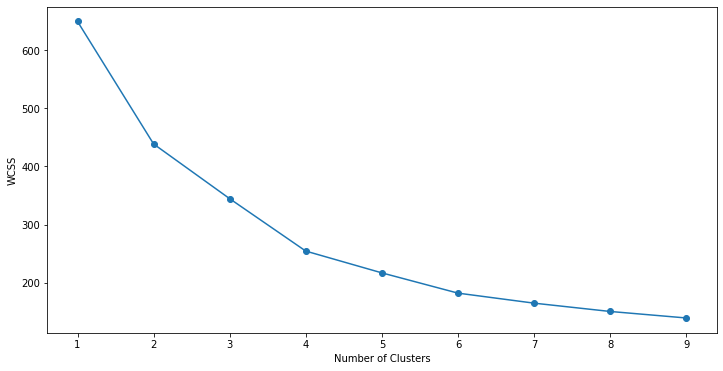

In [9]:
frame = pd.DataFrame({'Cluster': range(1,10), 'WCSS': WCSS})

plt.figure(figsize=(12,6))

plt.plot(frame['Cluster'], frame['WCSS'], marker='o')

plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

### silhouette_score: 
The best value is 1 and the worst value is -1. Values near 0 indicate
overlapping clusters. Negative values generally indicate that a sample has
been assigned to the wrong cluster, as a different cluster is more similar. The more close to one, the better in clustering. 


In [11]:
kmeans = KMeans(4)
kmeans.fit(newdf)

print(silhouette_score(newdf, kmeans.labels_)), print(kmeans.labels_)

0.35027020434653977
[2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 3 2 2 2 0 0 0 0 2 3 1 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


(None, None)

In [12]:
df2 = df.copy()
df2["Gender"]= df2["Gender"].map({'Male' : 0, 'Female' : 1})
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [13]:
clusters = kmeans.fit_predict(df2)

In [14]:
newdf['label'] = clusters
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender,label
0,-1.738999,-1.424569,-0.434801,0,2
1,-1.738999,-1.281035,1.195704,0,2
2,-1.700830,-1.352802,-1.715913,1,2
3,-1.700830,-1.137502,1.040418,1,2
4,-1.662660,-0.563369,-0.395980,1,2


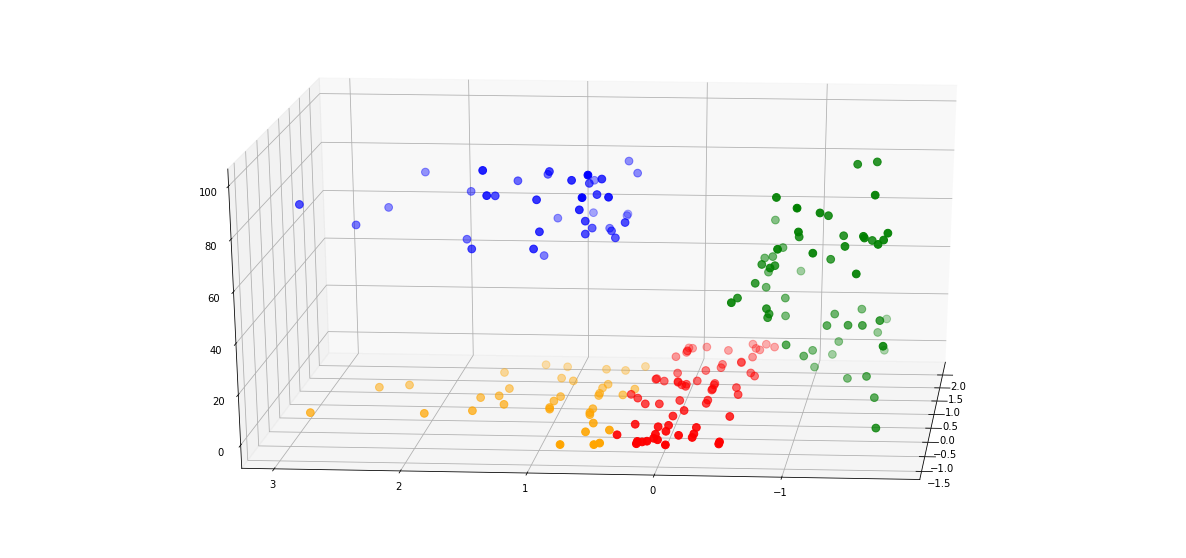

In [15]:
fig = plt.figure(figsize=(21,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(newdf["Age"][newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], df["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf["Age"][newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf["Age"][newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], df["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf["Age"][newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(20, 185)
plt.show()

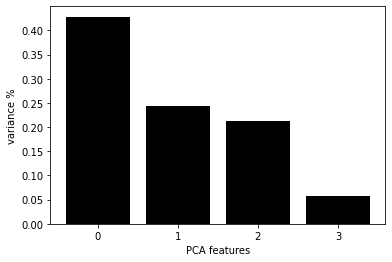

In [16]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

plt.xlabel('PCA features')

plt.ylabel('variance %')

plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

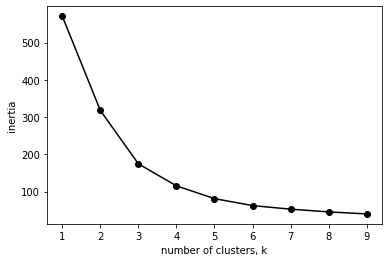

In [17]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [18]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean')) 

0.4810375663798591


In [ ]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters

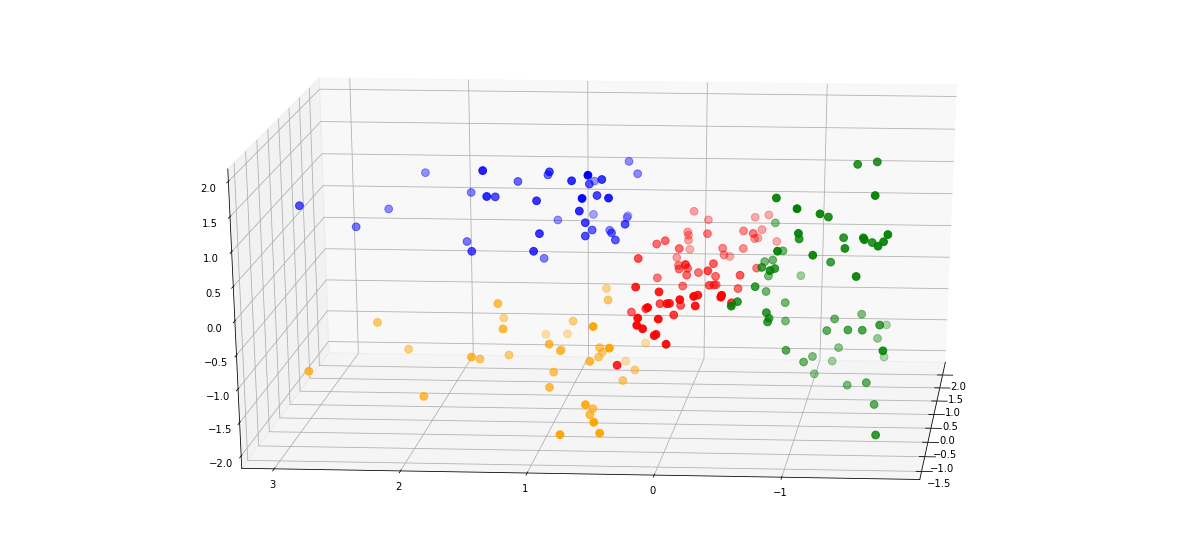

In [19]:
fig = plt.figure(figsize=(21,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(newdf["Age"][newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf["Age"][newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf["Age"][newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf["Age"][newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(20, 185)
plt.show()

In [20]:
df = pd.read_csv('https://github.com/fozouni/data-science-exercises/raw/main/Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [21]:
avg_df = df.groupby(['cluster'], as_index=False).mean()
avg_df.head()

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,51.545455,56.272727,48.781818
1,1,44.250000,68.692308,17.288462
2,2,25.166667,38.333333,60.277778
3,3,32.692308,86.538462,82.128205


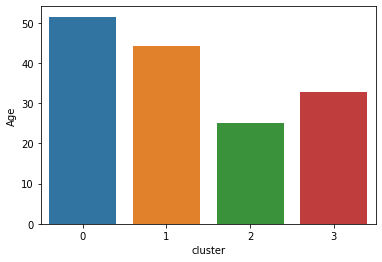

In [22]:
sns.barplot(x='cluster',y='Age',data=avg_df)

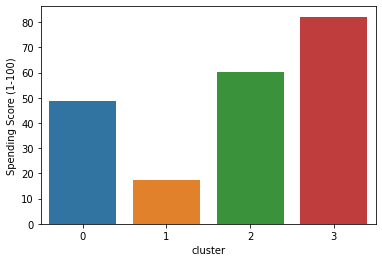

In [23]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

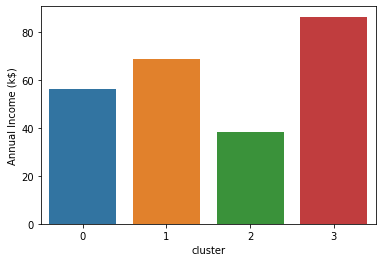

In [24]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

In [25]:
df2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
df2.head()

Gender
cluster Gender        
0       Female      32
        Male        23
1       Female      26
        Male        26
2       Female      33

## Cluster 0: The frugal spender
This persona comprises of middle aged individuals who are very careful with money.

Despite having the highest average income compared to individuals in all other clusters, they spend the least.

This might be because they have financial responsibilities - like saving up for their kid's higher education.

Recommendation: Promos, coupons, and discount codes will attract individuals in this segment due to their tendency to spend less.

## Cluster 1: Almost retired
This segment comprises of an older group of people.

They earn less and spend less, and are probably saving up for retirement.

Recommendation: Marketing to these individuals can be done through Facebook, which appeals to an older demographic. Promote healthcare related products to people in this segment.

## Cluster 2: The careless buyer
This segment is made up of a younger age group.

Individuals in this segment are most likely first jobbers. They make the least amount of money compared to all other segments.

However, they are very high spenders.

These are enthusiastic young individuals who enjoy living a good lifestyle, and tend to spend above their means.

Recommendation: Since these are young individuals who spend a lot, providing them with travel coupons or hotel discounts might be a good idea. Providing them with discounts off top clothing and makeup brands would also work well for this segment.

## Cluster 3: Highly affluent individuals
This segment is made up of middle-aged individuals.

These are individuals who have worked hard to build up a significant amount of wealth.

They also spend large amounts of money to live a good lifestyle.

These individuals have likely just started a family, and are leading baby or family-focused lifestyles. It is a good idea to promote baby or child related products to these individuals.

Recommendation: Due to their large spending capacity and their demographic, these individuals are likely to be looking for properties to buy or invest in. They are also more likely than all other segments to take out housing loans and make serious financial commitments.



## This project is originated from the following post:



https://www.natasshaselvaraj.com/customer-segmentation-with-python/